In [1]:
from main import *
from hyperparameter import *
from transferlearning import *

import warnings
warnings.filterwarnings("ignore")

2024-09-26 14:24:51.635923: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-26 14:24:51.645599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 14:24:51.656098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 14:24:51.659152: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 14:24:51.667606: I tensorflow/core/platform/cpu_feature_guar

# Preprocessing, Visualization, and Data Split

In [2]:
data_dir ='data' # Change to the path to your directory
train_images_dir = os.path.join(data_dir, 'Training')
test_images_dir = os.path.join(data_dir, 'Testing')
print(f"Data directory: {data_dir}")
print(f"Training directory: {train_images_dir}")
print(f"Testing directory: {test_images_dir}")

Data directory: data
Training directory: data/Training
Testing directory: data/Testing


In [3]:
# Load the training and test data
try:
    train_data, test_data = get_images(train_images_dir, test_images_dir)
    print("Data loading completed successfully.")
    print(f"Number of training samples: {train_data.samples}")
    print(f"Number of test samples: {test_data.samples}")
    print(f"Class names: {train_data.class_indices}")
except Exception as e:
    print(f"Error loading data: {e}")
    raise

class_names_train = list(train_data.class_indices.keys())
class_names_test = list(test_data.class_indices.keys())

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Data loading completed successfully.
Number of training samples: 5712
Number of test samples: 1311
Class names: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


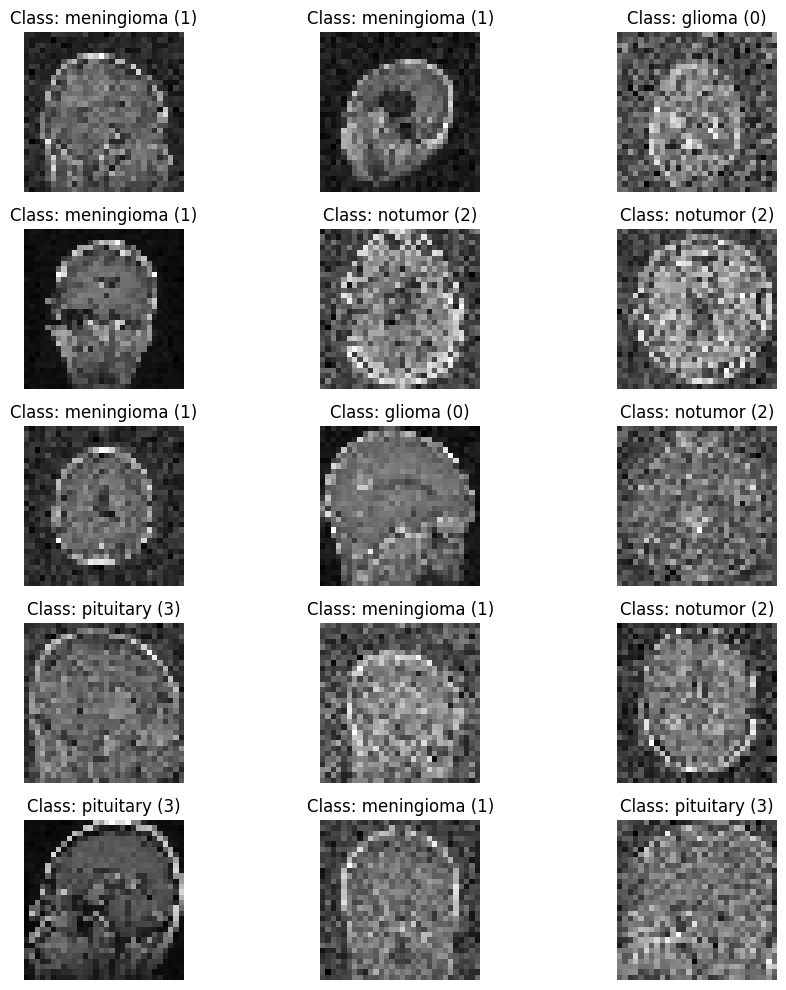

In [4]:
# Visualizing 15 Random Samples
visualize_batch(train_data)

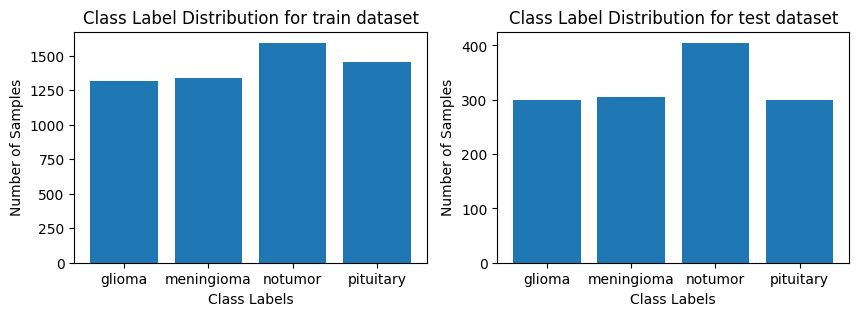

In [5]:
# Visualizing class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3))
plot_class_dist(ax1, train_data, "train")
plot_class_dist(ax2, test_data, "test")

In [6]:
X_train, y_train, X_val, y_val = train_val_split(train_data)
X_test, y_test = convert_test(test_data)

Number of batches in the training data: 179
Batch size of a single batch 32
Number of samples in the training dataset 5712

Number of training data batches with val split of 0.2: 144
Number of validation data batches: 35



I0000 00:00:1727353498.415212   27131 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727353498.436498   27131 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727353498.436543   27131 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727353498.438406   27131 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727353498.438439   27131 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Shape of image training set: (4608, 30, 30, 1)
Shape of image validation set: (1104, 30, 30, 1)

Shape of label training set: (4608, 4)
Shape of label validation set: (1104, 4)
Number of batches in the test data: 41
Batch size of a single batch 32
Number of samples in the test dataset 1311

Shape of image test set: (1311, 30, 30, 1)

Shape of label test set: (1311, 4)


# Models

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential,  layers, Input, optimizers, callbacks


In [8]:
def baseline():
    baseline = Sequential()
    baseline.add(Input(shape = (30, 30, 1)))
    baseline.add(layers.Conv2D(32, (3, 3), activation = "relu"))
    baseline.add(layers.MaxPooling2D((2, 2)))
    baseline.add(layers.Conv2D(32, (3, 3), activation = "relu"))
    baseline.add(layers.MaxPooling2D((2, 2)))
    baseline.add(layers.Flatten())
    baseline.add(layers.Dense(32, activation = "relu"))
    baseline.add(layers.Dense(4, activation = "softmax"))
    baseline.compile(optimizer = "adam",
                    loss = "categorical_crossentropy",
                    metrics = ["accuracy",
                               precision,
                               recall,
                               "F1Score"])
    return baseline

In [9]:
early_stopping = callbacks.EarlyStopping(monitor= 'val_loss', patience = 10, start_from_epoch= 10, restore_best_weights= True)
base = baseline()
basehistory = base.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data = (X_val, y_val), callbacks = early_stopping)

Epoch 1/20


NotImplementedError: Cannot convert a symbolic tf.Tensor (mul_1:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.

In [ ]:
models = [base]

metr, f1 = get_metrics(models, X_test, y_test, class_names_test)

In [ ]:
%

In [ ]:

def pim(activation = 'relu'): 
    model = Sequential()
    model.add(Input(shape = (30, 30, 1)))
    
    model.add(layers.Conv2D(128, (3, 3), activation=activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation=activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    
    model.add(layers.Conv2D(32, (3, 3), activation=activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(16, (3, 3), activation= activation, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, 2))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation=activation))
    model.add(layers.Dropout(rate = 0.5))
    model.add(layers.Dense(32, activation = activation))
    model.add(layers.Dropout(rate = 0.25))
    model.add(layers.Dense(16, activation = activation))
    model.add(layers.Dense(4, activation = "softmax"))

    model.compile(optimizer = optimizers.Adam(learning_rate= 0.001), 
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy",
                             "precision",
                             "recall",
                             "F1Score"])
    return model

# Transfer learning

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

def vgg16(vgg16_resolution = 224 ):
    # vgg16 expects (224,224,3) input. Minimum input is (32,32,3) but it will not generate good features
    
    # initialize VGG16 model and make it non trainable. Don't get the last FC layer by setting include_top to false
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(vgg16_resolution,vgg16_resolution,3))
    base_model.trainable = False 
    
    # initialise model 
    vgg16_model = Sequential()
    # add vgg16 compliant input
    vgg16_model.add(Input(shape = (vgg16_resolution, vgg16_resolution, 1)))
    
    # change our image to 224x224
    vgg16_model.add(layers.Lambda(lambda x: tf.image.resize(x, (vgg16_resolution, vgg16_resolution)))) 
    
    # change image to rgb
    vgg16_model.add(layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x)))
    
    # add vgg16 model 
    vgg16_model.add(base_model)
    
    # add as many FC layers as needed with dropout to prevent overfitting 
    vgg16_model.add(layers.Flatten())
    # vgg16_model.add(layers.Dense(128, activation='relu')) 
    # Added L2 regularization and batch normalization
    vgg16_model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    # vgg16_model.add(layers.BatchNormalization()) <-- does not seem to have positive impact
    vgg16_model.add(layers.Dropout(0.3))
    vgg16_model.add(layers.Dense(64, activation='relu')) # only one 64 unit layer results were: accuracy: 0.7567 - loss: 0.5959 - val_accuracy: 0.6993 - val_loss: 0.7358
    # vgg16_model.add(layers.BatchNormalization()) <-- does not seem to have positive impact
    vgg16_model.add(layers.Dense(4, activation='softmax'))
    
    vgg16_model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=["accuracy",
                "precision",
                "recall",
                "F1Score"],
    )
    return vgg16_model

In [ ]:
# Resnet50

def resnet(resnet_resolution = 224 ):  
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(resnet_resolution,resnet_resolution,3))
    base_model.trainable = False ## 
    
    resnet_model = Sequential()
    resnet_model.add(Input(shape = (resnet_resolution, resnet_resolution, 1)))
    resnet_model.add(layers.Lambda(lambda x: tf.image.resize(x, (resnet_resolution, resnet_resolution)))) 
    resnet_model.add(layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x)))
    resnet_model.add(base_model)
    resnet_model.add(layers.Flatten())
    resnet_model.add(layers.Dense(128, activation='relu'))
    resnet_model.add(layers.Dropout(0.3))
    resnet_model.add(layers.Dense(64, activation='relu'))
    resnet_model.add(layers.Dense(4, activation='softmax'))
    
    
    resnet_model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=["accuracy",
                 "precision",
                 "recall",
                 "F1Score"],
    )
    return resnet_model

In [ ]:
# Densenet121
def densenet(densenet_resolution = 224):

    base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=(densenet_resolution,densenet_resolution,3))
    base_model.trainable = False ## 
    
    densenet_model = Sequential()
    densenet_model.add(Input(shape = (densenet_resolution, densenet_resolution, 1)))
    densenet_model.add(layers.Lambda(lambda x: tf.image.resize(x, (densenet_resolution, densenet_resolution)))) 
    densenet_model.add(layers.Lambda(lambda x: tf.image.grayscale_to_rgb(x)))
    densenet_model.add(base_model)
    densenet_model.add(layers.Flatten())
    densenet_model.add(layers.Dense(128, activation='relu'))
    densenet_model.add(layers.Dense(4, activation='softmax'))
    
    
    densenet_model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=["accuracy",
                 "precision",
                 "recall",
                 "F1Score"
                ],
    )
    return densenet_model

# Model Comparison

In [ ]:
%

In [ ]:
early_stopping = callbacks.EarlyStopping(monitor= 'val_loss', patience = 10, start_from_epoch= 10, restore_best_weights= True)

In [ ]:
base = baseline()
pim = pim()
vgg16 = vgg16()
resnet = resnet()
densenet = densenet()

In [ ]:
basehistory = base.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_data = (X_val, y_val), callbacks = early_stopping)

In [ ]:
pimhistory = pim.fit(X_train, y_train, batch_size = 16, epochs = 30, validation_data = (X_val, y_val), callbacks = early_stopping)

In [ ]:
vgg16history = vgg16.fit(X_train, y_train, batch_size = 16, epochs = 20, validation_data = (X_val, y_val), callbacks = early_stopping)

In [ ]:
resnethistory = resnet.fit(X_train, y_train, batch_size = 16, epochs = 30, validation_data = (X_val, y_val), callbacks = early_stopping)

In [ ]:
densenethistory = densenet.fit(X_train, y_train, batch_size = 16, epochs = 30, validation_data = (X_val, y_val), callbacks = early_stopping)

In [ ]:
models = [base, pim, resnet, densenet]
metr, f1 = get_metrics(models, X_test, y_test, class_names_test)
display(metr.rename(columns = {0: "base", 1: "pim", 2: "resnet", 3: "densenet"}))
display(f1.rename(columns = {0: "base", 1: "pim", 2: "resnet", 3: "densenet"}))